In [14]:
import numpy as np
import matplotlib.pyplot as plt

from ocvx import Newton, Function, constant, backtracking, Probleme

# Génération de problème d'optimisation

In [10]:
f_d = {
    "dim": 1,
    "value": lambda x: x[0]**2 + 3 * x[0] + 12,
    "grad": lambda x: np.array([2*x[0] + 3]),
    "hessian": lambda x: np.diag([2])
}

In [3]:
f_2_d = {
    "dim": 2,
    "value": lambda x: x[0]**2 + 20 * x[1]**2,
    "grad": lambda x: np.array([2*x[0], 40*x[1]]),
    "hessian": lambda x: np.diag([2, 40])
}

In [11]:
f = Function(**f_d)
#f2 = Function(**f_2_d)

# Méthode de Newton

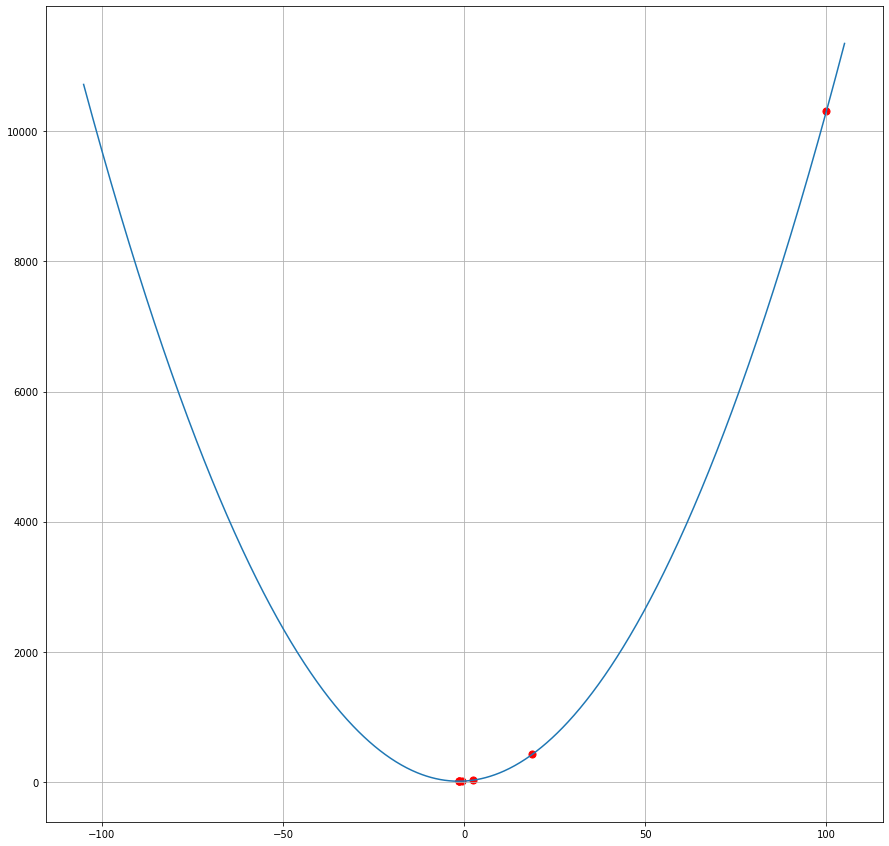

In [12]:
meth = Newton(f, backtracking)
meth(np.array([100, 100]))
meth.plot()

# Newton avec contrainte d'égalité

In [28]:
A = np.array([[1, 3]])
b = np.array([1])
f_d = {
    "value": lambda x: x[0]**2 + x[1]**2,
    "dim": 2,
    "grad": lambda x: np.array([2 * x[0], 2 * x[1]]),
    "hessian": lambda x: np.diag([2, 2])
}
P = Probleme(Function(**f_d), A, b)

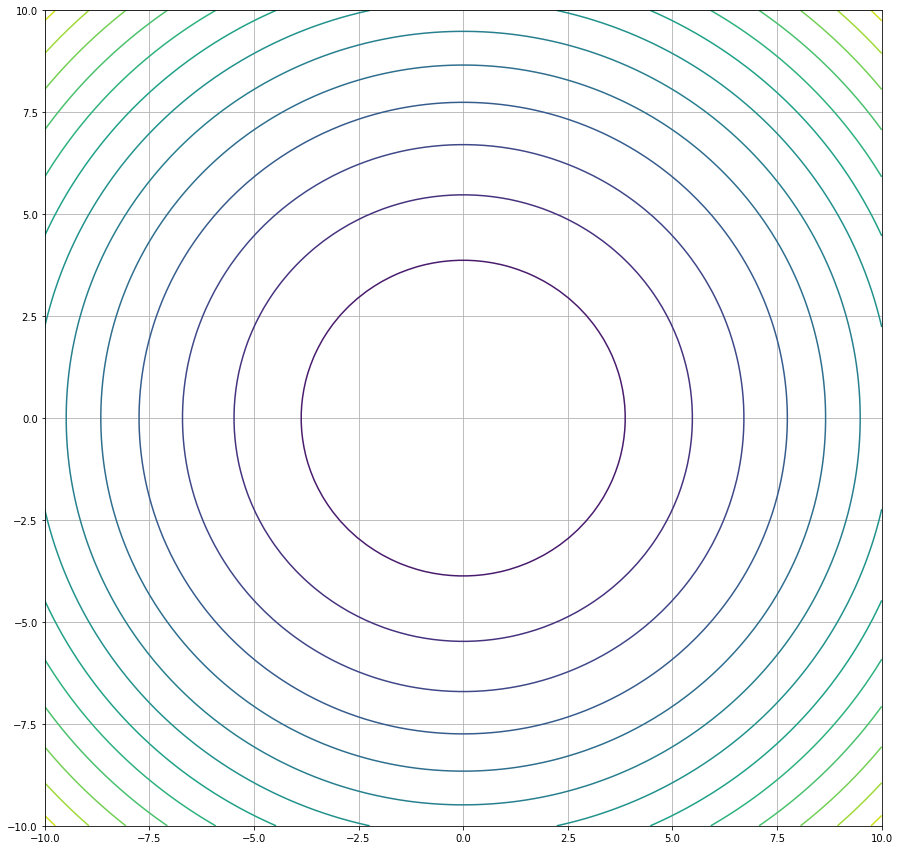

In [29]:
plt.figure(figsize=(15, 15))
x, y = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(2, -1)
z = P.f.value(x_y)
plt.contour(X, Y, z.reshape(100, -1), 15)
plt.grid()
plt.show()

In [50]:
def newton_step(P, x):
    KKT = np.vstack([np.hstack([P.f.hessian(x), P.A.T]), np.hstack([P.A, np.zeros((P.A.T.shape[1], P.A.T.shape[1])).astype(P.A.dtype)])])
    g = P.f.grad(x)
    res = np.hstack([-1 * g, np.zeros((KKT.shape[0] - g.shape[0]))])
    x_out = np.linalg.solve(KKT, res)
    return x_out[:P.f.dim]

newton_step(P, np.array([-299, 100]))

array([299.1, -99.7])